# Reference Input Data Library (RIPL)

In this brief notebook, we use the processed RIPL data to explore and visualize some attributes. Let us start by importing the necessary packages.

**NOTE: This notebook is not meant to be a complete exploration resource. You are responsible for exploring and validating any provided data.**

In [2]:
# # PROTOTYPE
# import sys
# sys.path.append("../..")

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
import matplotlib.pyplot as plt
import os

import nucml.datasets as nuc_data

In [4]:
# Specifying directory to save figures
figure_dir = "Figures/"

## Loading RIPL/ENSDF Data 

Let us first load both the original and the cut-off RIPL data. Recall that the cut-off version is based on the RIPL cut-off parameters.

In [5]:
ensdf_df = nuc_data.load_ensdf(append_ame=True)
ensdf_cutoff_df = nuc_data.load_ensdf(cutoff=True, append_ame=True)

INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/ENSDF\CSV_Files/ensdf.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:/Users/Pedro/Desktop/ML_Nuclear_Data/AME/CSV_Files\AME_all_merged_no_NaN.csv
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/ENSDF\CSV_Files/ensdf_cutoff.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:/Users/Pedro/Desktop/ML_Nuclear_Data/AME/CSV_Files\AME_all_merged_no_NaN.csv


## Plotting Some Features Distributions

### Isotope Energy Distribution

Let us observe what is the energy distribution as a function of the number of protons for all known levels against the cut-off dataset.

In [6]:
sns.set(font_scale = 2)
sns.set_style("white")

C:\Users\Pedro\Anaconda3\envs\nucml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pedro\Anaconda3\envs\nucml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


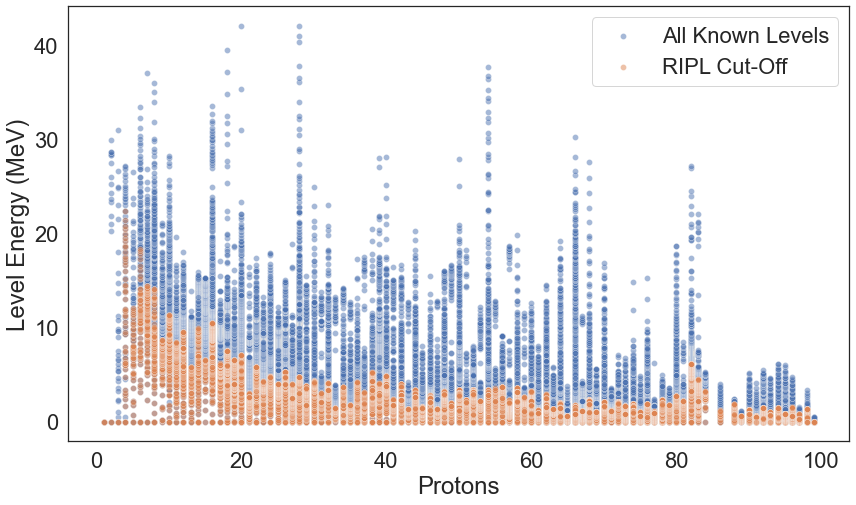

In [7]:
plt.figure(figsize=(14, 8))
sns.scatterplot(ensdf_df.Z, ensdf_df.Energy, alpha=0.5, label="All Known Levels")
sns.scatterplot(ensdf_cutoff_df.Z, ensdf_cutoff_df.Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.xlabel("Protons")
plt.savefig(os.path.join(figure_dir, 'ENSDF_Z_E.png'), transparent=False, bbox_inches='tight', dpi=600)

Similarly, for neutrons:

C:\Users\Pedro\Anaconda3\envs\nucml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pedro\Anaconda3\envs\nucml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


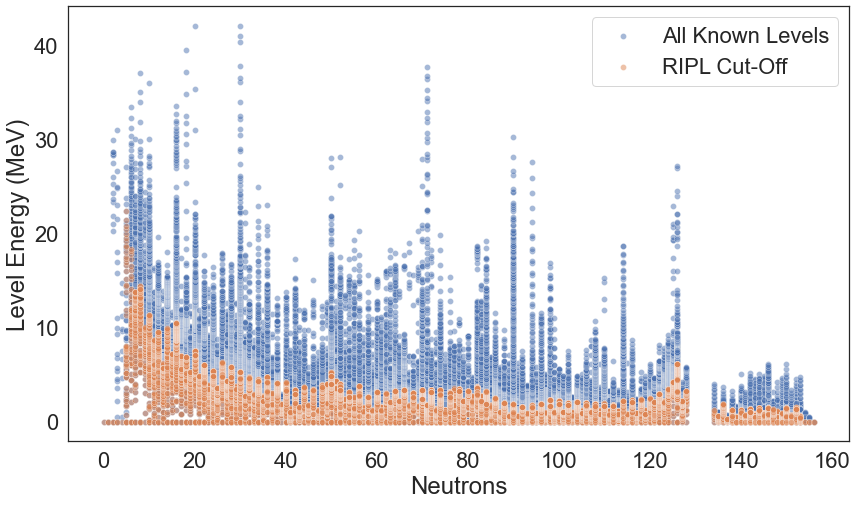

In [8]:
plt.figure(figsize=(14, 8))
sns.scatterplot(ensdf_df.N, ensdf_df.Energy, alpha=0.5, label="All Known Levels")
sns.scatterplot(ensdf_cutoff_df.N, ensdf_cutoff_df.Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.xlabel("Neutrons")
plt.savefig(os.path.join(figure_dir, 'ENSDF_N_E.png'), transparent=False, bbox_inches='tight', dpi=600)

### Atomic Mass Number Distribution

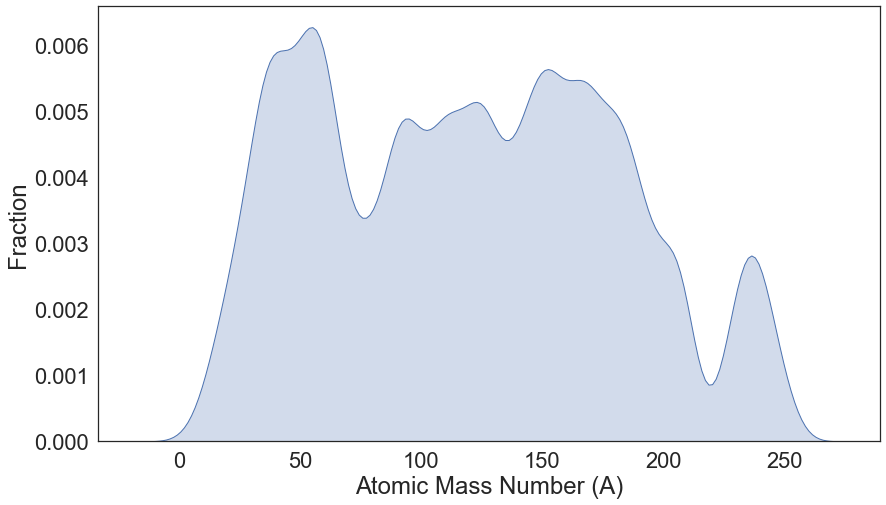

In [9]:
plt.figure(figsize=(14,8))
g = sns.kdeplot(ensdf_df.A, shade=True);
g.set(xlabel="Atomic Mass Number (A)", ylabel="Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_Atomic_Mass_Dist.png'), bbox_inches='tight', dpi=600)

### Energy Distribution

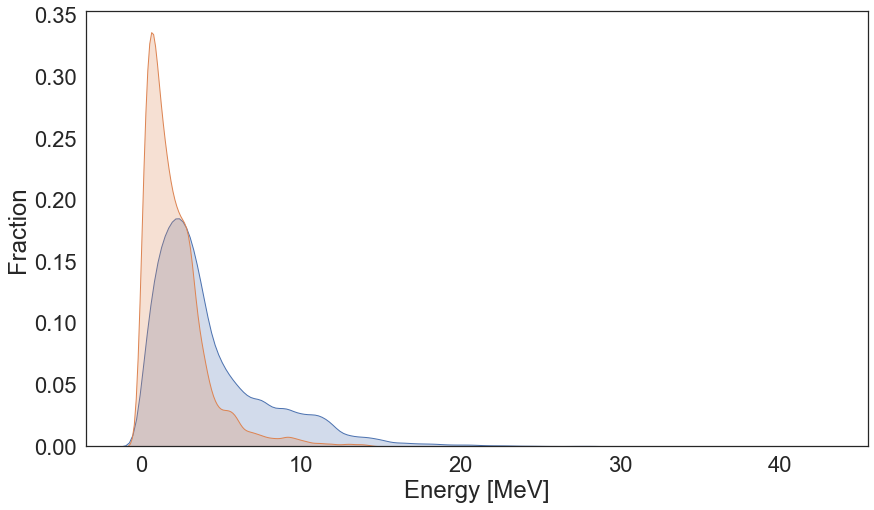

In [10]:
plt.figure(figsize=(14, 8))
sns.kdeplot(ensdf_df.Energy.values, shade=True, label="All Known Levels");
sns.kdeplot(ensdf_cutoff_df.Energy.values, shade=True, label='RIPL Cut-Off');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_E_Dist.png'), bbox_inches='tight', dpi=600)

### Level Number Distribution

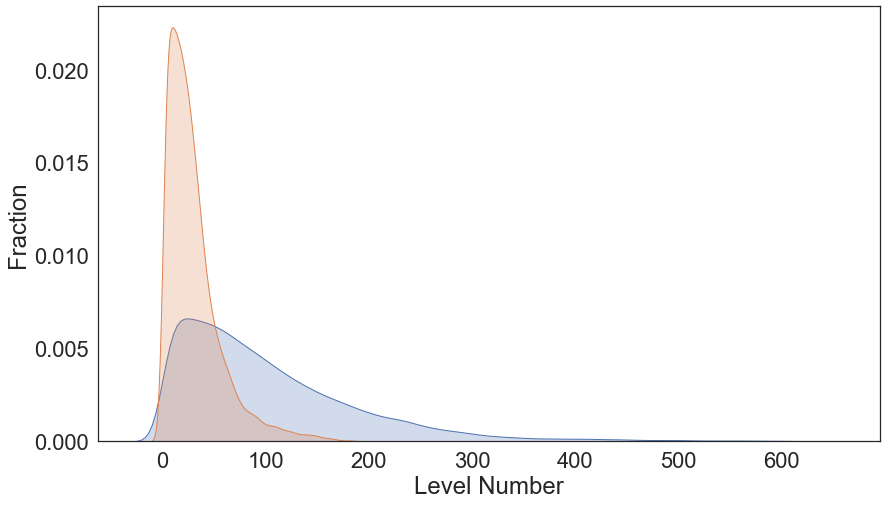

In [11]:
plt.figure(figsize=(14,8))
sns.kdeplot(ensdf_df.Level_Number.values, shade=True, label="All Known Levels");
sns.kdeplot(ensdf_cutoff_df.Level_Number.values, shade=True, label="RIPL Cut-Off");
plt.xlabel("Level Number")
plt.ylabel("Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_L_Dist.png'), bbox_inches='tight', dpi=600)

### Uranium and Chlorine Energy Distribution

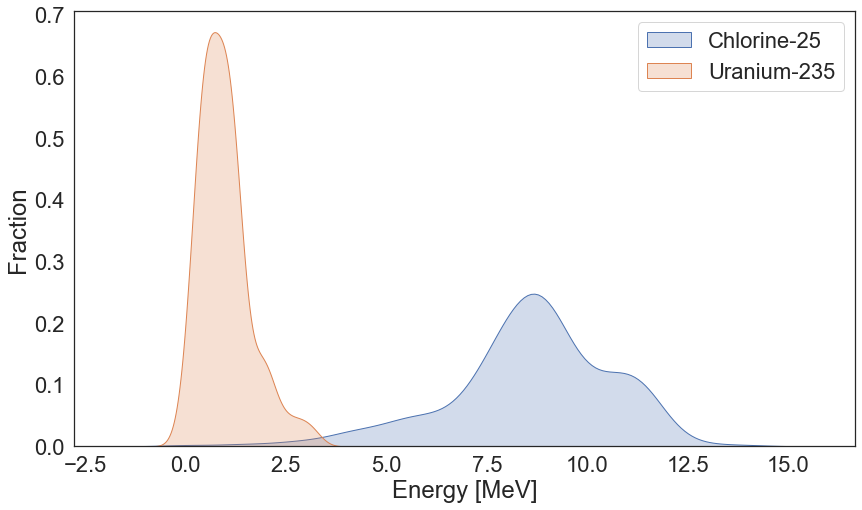

In [12]:
plt.figure(figsize=(14, 8))
chlorine = ensdf_df[ensdf_df.Element_w_A == "35Cl"]
uranium = ensdf_df[ensdf_df.Element_w_A == "233U"]
sns.kdeplot(chlorine.Energy.values, shade=True, label="Chlorine-25");
sns.kdeplot(uranium.Energy.values, shade=True, label='Uranium-235');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.legend()
plt.savefig(os.path.join(figure_dir, 'ENSDF_Cl_U_E_Dist.png'), bbox_inches='tight', dpi=600)

## Energy vs Level Number

Ideally, we would like to model the level energy vs level number. It is a difficult challenge as there are collective states and more. Furthemore, when implementing the RIPL cut-off parameters, we lose more than half of the avaliable data for training. 

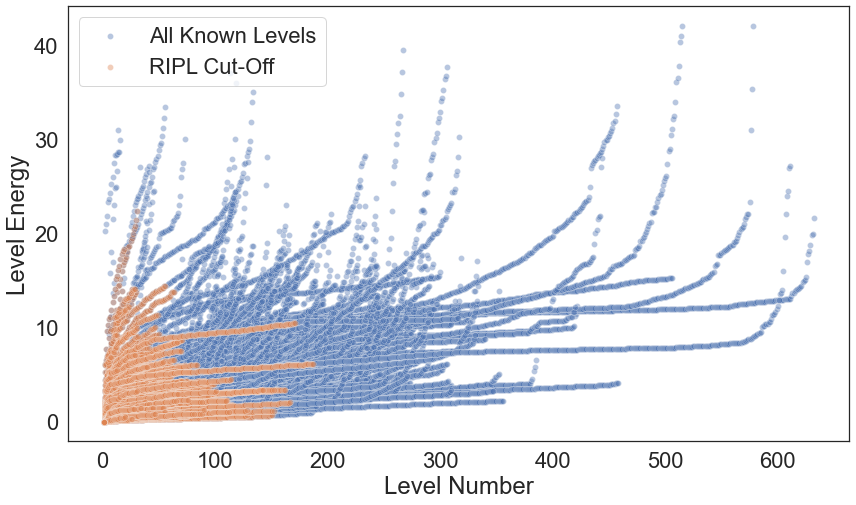

In [13]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Level_Number', y='Energy', data=ensdf_df, alpha=0.4, label="All Known Levels")
sns.scatterplot(x='Level_Number', y='Energy', data=ensdf_cutoff_df, alpha=0.4, label="RIPL Cut-Off")
plt.xlabel("Level Number")
plt.ylabel("Level Energy")
plt.savefig(os.path.join(figure_dir, 'ENSDF_E_vs_L.png'), bbox_inches='tight', dpi=600)

## NucML Plotting Utilities: Level and Level Density

For EXFOR, a useful future might be the level density at incident energies. To model RIPL/XUNDL we can take two approaches: (1) model the level energy as a function of the level number with the cut-off dataset or (2) model the level density. We can visualize the level density using `NucML` ensdf plotting utilities. Let us import it.

In [14]:
import nucml.ensdf.plot as ensdf_plot

We can plot the level density of both the original and the cut-off dataset. All you need to do is pass both datasets to the `level_density()` function. For example, let us plot it for Chlorine 35:

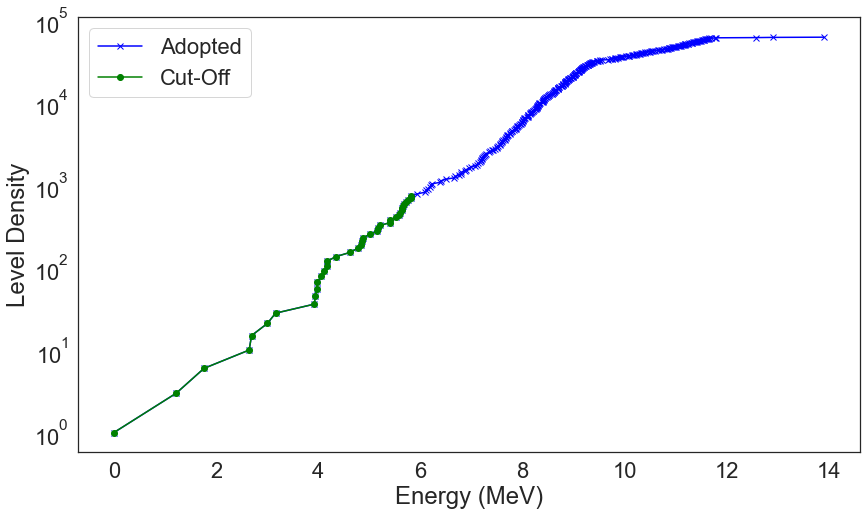

In [15]:
ensdf_plot.level_density(ensdf_df, 17, 35, df2=ensdf_cutoff_df, save=True, save_dir=figure_dir)

and for Uranium-233:

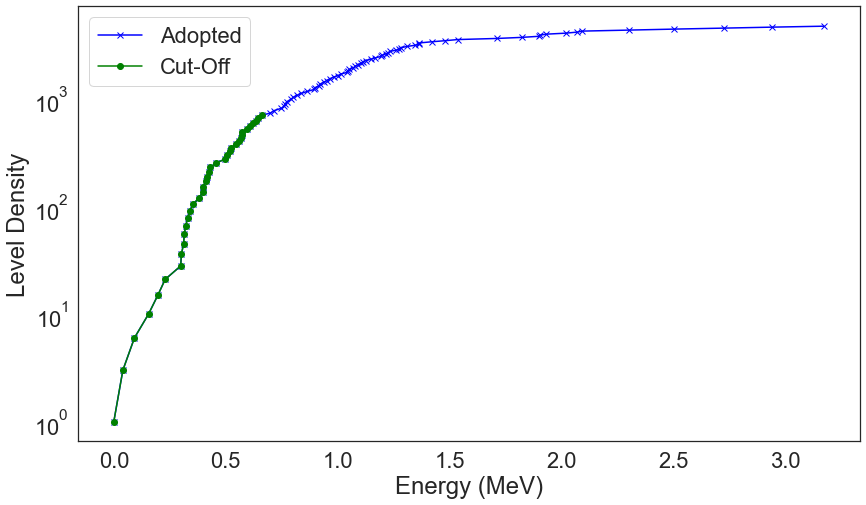

In [16]:
ensdf_plot.level_density(ensdf_df, 92, 233, df2=ensdf_cutoff_df, save=True, save_dir=figure_dir)

## Statistics Example - Chlorine-35 and Uranium-235

In [17]:
from scipy import stats

In [18]:
def pearson_corr(protons, neutrons, df):
    to_plot = df[(df["Z"] == protons) & (df["N"] == neutrons)].sort_values(by='Level_Number', ascending=True)
    pearson_coef, p_value = stats.pearsonr(to_plot['Level_Number'], to_plot['Energy'])
    print("Results for {}:".format(to_plot.Element_w_A.iloc[0]))
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [19]:
chlorine = ensdf_df[ensdf_df.Element_w_A == "35Cl"].sort_values(by='Level_Number', ascending=True)
uranium = ensdf_df[ensdf_df.Element_w_A == "235U"].sort_values(by='Level_Number', ascending=True)

In [20]:
chlorine.iloc[:,:10].describe()

Level_Number      Energy        Spin      Parity     Half_Life  \
count    352.000000  352.000000  352.000000  352.000000  1.020000e+02   
mean     176.500000    8.579085    0.735795    0.085227  4.559895e-13   
std      101.757883    2.029201    2.180220    0.648125  3.147776e-12   
min        1.000000    0.000000   -1.000000   -1.000000  3.740000e-20   
25%       88.750000    7.691525   -1.000000    0.000000  6.124750e-18   
50%      176.500000    8.734000    0.500000    0.000000  1.901000e-16   
75%      264.250000    9.877750    2.500000    1.000000  1.350000e-14   
max      352.000000   13.900000   11.500000    1.000000  3.080000e-11   

           Gammas  Num_Decay_Modes  
count  352.000000            352.0  
mean     3.227273              0.0  
std      4.781201              0.0  
min      0.000000              0.0  
25%      0.000000              0.0  
50%      0.000000              0.0  
75%      6.000000              0.0  
max     17.000000              0.0

In [21]:
pd.DataFrame(chlorine.iloc[:,:10].corr()).sort_values(by='Energy', ascending=False).head()

Level_Number    Energy      Spin    Parity  Half_Life    Gammas  \
Energy            0.939196  1.000000 -0.170705 -0.138014  -0.199070 -0.302143   
Level_Number      1.000000  0.939196 -0.129374 -0.080478  -0.149506 -0.425753   
Parity           -0.080478 -0.138014  0.092596  1.000000  -0.118308 -0.015462   
Spin             -0.129374 -0.170705  1.000000  0.092596   0.174749  0.180695   
Half_Life        -0.149506 -0.199070  0.174749 -0.118308   1.000000 -0.039308   

              Num_Decay_Modes  
Energy                    NaN  
Level_Number              NaN  
Parity                    NaN  
Spin                      NaN  
Half_Life                 NaN

In [22]:
pearson_corr(17, 35-17, ensdf_df)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9391959945279038  with a P-value of P = 1.508712295824325e-164


In [23]:
pearson_corr(17, 35-17, ensdf_cutoff_df)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9020790472746514  with a P-value of P = 1.0588253532475289e-14


We can create correlation by using the log on both energy and level number.

In [24]:
ensdf_df_log = ensdf_df.copy()
ensdf_cutoff_df_log = ensdf_cutoff_df.copy()

In [25]:
ensdf_df_log.Level_Number = np.log10(ensdf_df_log.Level_Number)
ensdf_df_log = ensdf_df_log[ensdf_df_log.Energy != 0]
ensdf_df_log.Energy = np.log10(ensdf_df_log.Energy)

In [26]:
ensdf_cutoff_df_log.Level_Number = np.log10(ensdf_cutoff_df_log.Level_Number)
ensdf_cutoff_df_log = ensdf_cutoff_df_log[ensdf_cutoff_df_log.Energy != 0]
ensdf_cutoff_df_log.Energy = np.log10(ensdf_cutoff_df_log.Energy)

In [27]:
pearson_corr(17, 35-17, ensdf_df_log)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9757198447187734  with a P-value of P = 2.959948935021139e-232


In [28]:
pearson_corr(17, 35-17, ensdf_cutoff_df_log)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9635162177216403  with a P-value of P = 1.279072260851587e-21


In the log scale, the energy is highly correlated. The p-value results in 1% confidence that this correlation is significant. We, therefore, expect that a linear model will work in this data. However is not as simple as that, we know that this dependency might start as linear but start deviating at some point. 